# Simulating a coin tossing machine

Suppose that the coin was in fact fair, i.e., 𝑃(heads) = 0.5. 

To simulate tosses of a fair coin, we can invoke any random number generator. 

There are some easy ways to draw samples of an event with probability 0.5. 
For example Python’s random.random yields numbers in the interval [0, 1] where the probability of lying in any sub-interval [𝑎, 𝑏] ⊂ [0, 1] is equal to 𝑏 − 𝑎.

In [1]:
import random
import torch
from torch.distributions.multinomial import Multinomial
import matplotlib.pyplot as plt

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [45, 55]


In [3]:
fair_probs = torch.tensor([0.5, 0.5]) # define the probabilities for heads and tails
Multinomial(100, fair_probs).sample() # Simulate 100 tosses of a fair coin


tensor([52., 48.])

In [4]:
Multinomial(100, fair_probs).sample() / 100 #this is to get the probabilities of heads and tails

tensor([0.4500, 0.5500])

In [8]:
counts = Multinomial(10000, fair_probs).sample((10,)) # Simulate 10000 tosses of a fair coin
counts / 10000 #this is to get the probabilities of heads and tails

tensor([[0.4861, 0.5139],
        [0.5164, 0.4836],
        [0.4936, 0.5064],
        [0.4987, 0.5013],
        [0.4995, 0.5005],
        [0.4935, 0.5065],
        [0.5090, 0.4910],
        [0.4952, 0.5048],
        [0.5015, 0.4985],
        [0.4992, 0.5008]])

The law of large numbers and the central limit theorem tells us that in many situations, as the sample size 𝑛 grows, these errors should go down at a rate of $(1/\sqrt{𝑛})$. Let’s get some more intuition:


tensor([[1.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.0000e+00],
        [1.0000e+00, 2.0000e+00],
        ...,
        [4.9840e+03, 5.0140e+03],
        [4.9850e+03, 5.0140e+03],
        [4.9860e+03, 5.0140e+03]])


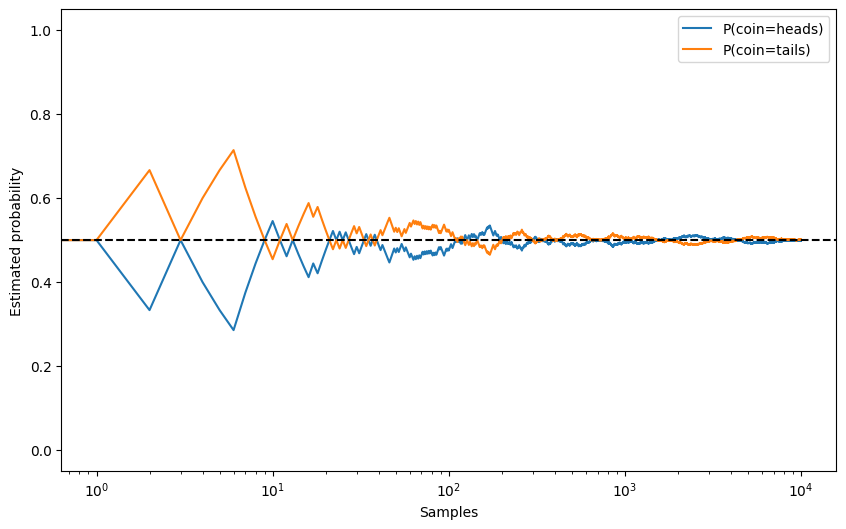

In [ ]:
counts = Multinomial(1, fair_probs).sample((10000,)) # this extracts 10000 samples of heads and tail
cum_counts = counts.cumsum(dim=0)   # Cummilitive counts
print(cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

plt.figure(figsize=(10, 6))
plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.xscale('log')
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated probability')
plt.legend()

## Exercises

When dealing with randomness, we denote the set of possible outcomes S and call it the sample space or outcome space. 

Here, each element is a distinct possible outcome. In the case of rolling a single coin, S = {heads, tails}. For a single die, S = {1, 2, 3, 4, 5, 6}. 

When flipping two coins, possible outcomes are {(heads, heads), (heads, tails), (tails, heads), (tails, tails)}.

### Ex 1 -- Simulate the roll of a regular fair dice

In [24]:
rolls = [1,2,3,4,5,6]
fair_probs = torch.tensor([1/6,1/6,1/6,1/6,1/6,1/6])  # define the probabilities for each roll
roll = Multinomial(1, fair_probs).sample() # Simulate 100 rolls of a dice
nonzero_index = torch.nonzero(roll)
print(rolls[nonzero_index])

5
